<a href="https://colab.research.google.com/github/AliConda/AliConda/blob/main/Best_of_Article_spectral_IZO_CNN_Spectra_ratio_fraction_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Importing the Spectral Data

In [2]:
df_raw=pd.read_excel('IZO_zeroed_sumed_scaled_CNN_copy.xlsx')
df_reserve=pd.read_excel('Full_IZO_spectral_ann.xlsx')

In [3]:
df_raw.head(3)

,200.0,200.2,200.4,200.6,200.8,201.0,201.2,201.4,201.6,201.8,202.0,202.2,202.4,202.6,202.8,203.0,203.2,203.4,203.6,203.8,204.0,204.2,204.4,204.6,204.8,205.0,205.2,205.4,205.6,205.8,206.0,206.2,206.4,206.6,206.8,207.0,207.2,207.4,207.6,207.8,...,1092.2,1092.4,1092.6,1092.8,1093.0,1093.2,1093.4,1093.6,1093.8,1094.0,1094.2,1094.4,1094.6,1094.8,1095.0,1095.2,1095.4,1095.6,1095.8,1096.0,1096.2,1096.4,1096.6,1096.8,1097.0,1097.2,1097.4,1097.6,1097.8,1098.0,1098.2,1098.4,1098.6,1098.8,1099.0,1099.2,1099.4,1099.6,1099.8,1100.0
0,9.822319e-07,0.0,0,0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,1.604555e-07,0.0,0,0,0,0.0,4.784590e-06,7.037184e-06,0.000008,0.000009,0.000006,9.818045e-07,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.055726e-07,...,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0.000000e+00,0.0,0,0,6.303286e-08,0.000002,0.000002,0.000001,4.746836e-07,0.0,0.0,0.000000e+00,0.0,0,0,0,0.0,5.574837e-07,1.736245e-06,0.000002,0.000003,0.000002,1.084387e-06,0.0,0.0,0,0,0,0,0.0,0.0,0.0,3.953345e-07,0.000002,0.000004,0.000006,0.000004,0.000002,0.0,0.000000e+00,...,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0
2,6.023756e-06,0.0,0,0,0.000000e+00,0.000000,0.000001,0.000002,2.889537e-06,0.0,0.0,0.000000e+00,0.0,0,0,0,0.0,0.000000e+00,4.839998e-07,0.000002,0.000004,0.000002,8.908240e-07,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000001,0.0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_raw.shape

(113, 4501)

In [5]:
df_raw=df_raw.iloc[:,:-1].values


Importing the scaler Library

In [6]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [7]:
ss=StandardScaler()
ms=MinMaxScaler()

In [8]:
df_raw_ss=ss.fit_transform(df_raw)
df_raw_ms=ms.fit_transform(df_raw)

Visualise a sample spectra of the PLASMA

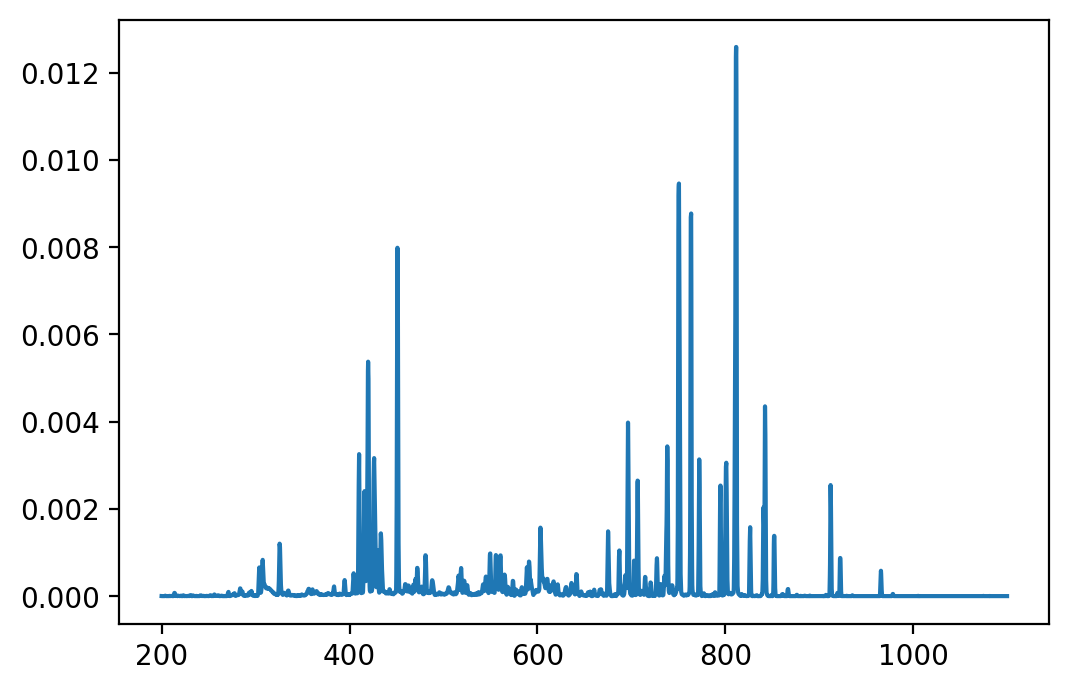

In [135]:
plt.figure(dpi=200)
plt.plot(np.arange(200,1100,.2),df_raw[0])

Convert the spectra into a 2D (50x90 pixel) image, unscaled, Standard scaled and MinMax scaled

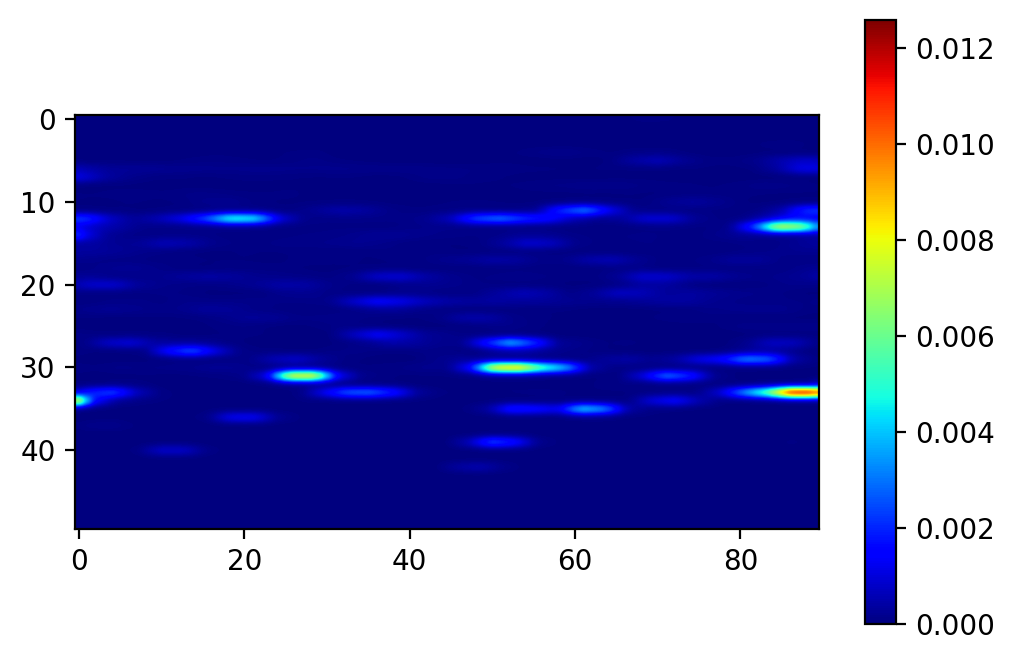

In [136]:
plt.figure(dpi=200)
plt.imshow(df_raw[0].reshape(50,90),cmap='jet',interpolation='gaussian')
plt.colorbar()

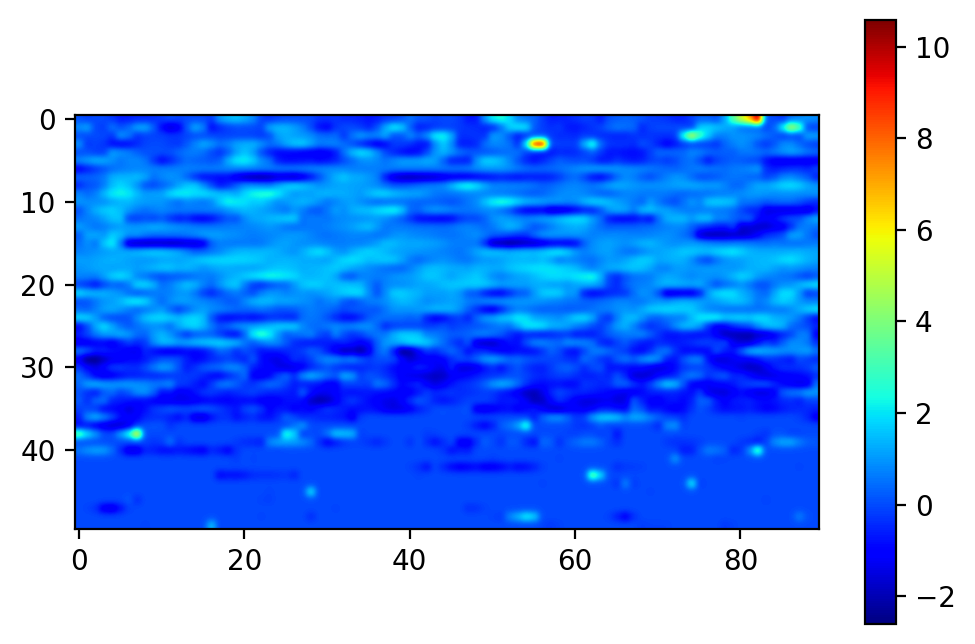

In [137]:
plt.figure(dpi=200)
plt.imshow(df_raw_ss[0].reshape(50,90),cmap='jet',interpolation='gaussian')
plt.colorbar()

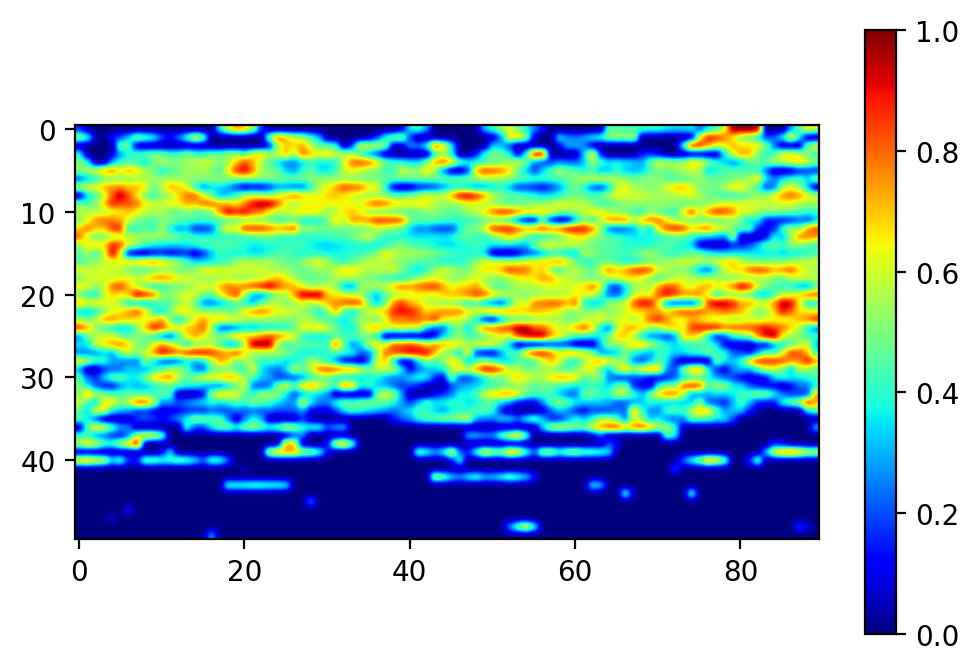

In [138]:
plt.figure(dpi=200)
plt.imshow(df_raw_ms[0].reshape(50,90),cmap='jet',interpolation='gaussian')
plt.colorbar()

Data preparation for CNN


In [12]:
images=[]

for i in range(0,113):
     images.append(df_raw[i].reshape(50,90))

In [13]:
images_ss=[]

for i in range(0,113):
     images_ss.append(df_raw_ss[i].reshape(50,90))

In [14]:
images_ms=[]

for i in range(0,113):
  images_ms.append(df_raw_ms[i].reshape(50,90))


In [15]:
len(images)

113

In [16]:
df_raw.shape

(113, 4500)

In [17]:
sheets=[]

for i in range(0,113):
  sheets.append(df_reserve['sheet'][i])


In [18]:
len(sheets)

113

In [19]:
df_raw.shape

(113, 4500)

In [20]:
images[0].max(),images_ss[0].max(),images_ms[0].max()

(0.01258807426547688, 10.583005244258365, 1.0000000000000002)

In [21]:
images[0].min(),images_ss[0].min(),images_ms[0].min()

(0.0, -2.6101851884218665, 0.0)

Splitting the Data into test and train batches for model learning

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(images,sheets,test_size=0.2)


X_train_ss,X_test_ss,y_train_ss,y_test_ss=train_test_split(images_ss,sheets,test_size=0.2)



X_train_ms,X_test_ms,y_train_ms,y_test_ms=train_test_split(images_ms,sheets,test_size=0.2)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout

In [25]:
X_train_array=np.array(X_train)

X_test_array=np.array(X_test)

y_train_array=np.array(y_train)

y_test_array=np.array(y_test)

In [26]:
X_train_array_ss=np.array(X_train_ss)

X_test_array_ss=np.array(X_test_ss)

y_train_array_ss=np.array(y_train_ss)

y_test_array_ss=np.array(y_test_ss)

In [27]:
X_train_array_ms=np.array(X_train_ms)

X_test_array_ms=np.array(X_test_ms)

y_train_array_ms=np.array(y_train_ms)

y_test_array_ms=np.array(y_test_ms)

In [28]:
X_train_array.shape, X_train_array_ss.shape, X_train_array_ms.shape

((90, 50, 90), (90, 50, 90), (90, 50, 90))

In [29]:
X_train_array=X_train_array.reshape(90,50,90,1)

X_test_array=X_test_array.reshape(23,50,90,1)


X_train_array_ss=X_train_array_ss.reshape(90,50,90,1)

X_test_array_ss=X_test_array_ss.reshape(23,50,90,1)


X_train_array_ms=X_train_array_ms.reshape(90,50,90,1)

X_test_array_ms=X_test_array_ms.reshape(23,50,90,1)



##Building the CNN models

In [30]:

model_2=Sequential()

model_2.add(Conv2D(filters=10,
                   kernel_size=3,
                   input_shape=(50,90,1),
                   activation='relu'))

model_2.add(MaxPool2D(pool_size=(2,2)))


#model_1.add(Conv2D(filters=32,
                   #kernel_size=(3,3),
                   #activation='relu'))
            
#model_1.add(MaxPool2D(pool_size=(2,2)))


model_2.add(Flatten())


model_2.add(Dense(units=11000,activation='relu'))

model_2.add(Dense(units=5000,activation='relu'))
model_2.add(Dense(units=100,activation='relu'))
#model.add(Dense(units=100,activation='relu'))
model_2.add(Dense(units=20,activation='relu'))


model_2.add(Dense(1))

model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss=tf.keras.losses.mse,
              metrics=['mse'])


In [123]:

model_2_ss=Sequential()

model_2_ss.add(Conv2D(filters=20,
                   kernel_size=3,
                   input_shape=(50,90,1),
                   activation='relu'))

model_2_ss.add(MaxPool2D(pool_size=(2,2)))


model_2_ss.add(Conv2D(filters=32,
                   kernel_size=(3,3),
                   activation='relu'))
            
model_2_ss.add(MaxPool2D(pool_size=(2,2)))


model_2_ss.add(Flatten())


model_2_ss.add(Dense(units=5000,activation='relu'))
model_2_ss.add(Dense(units=5000,activation='relu'))

model_2_ss.add(Dense(units=100,activation='relu'))
#model_1_ss.add(Dense(units=100,activation='relu'))
model_2_ss.add(Dense(units=20,activation='relu'))


model_2_ss.add(Dense(1))

model_2_ss.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss=tf.keras.losses.mse,
              metrics=['mse'])

In [90]:

model_2_ms=Sequential()

model_2_ms.add(Conv2D(filters=20,
                   kernel_size=5,
                   input_shape=(50,90,1),
                   activation='relu'))

model_2_ms.add(MaxPool2D(pool_size=(2,2)))


model_2_ms.add(Conv2D(filters=32,
                   kernel_size=(3,3),
                   activation='relu'))
            
model_2_ms.add(MaxPool2D(pool_size=(2,2)))


model_2_ms.add(Flatten())


model_2_ms.add(Dense(units=5000,activation='relu'))

model_2_ms.add(Dense(units=5000,activation='relu'))
model_2_ms.add(Dense(units=100,activation='relu'))
#model_1_ms.add(Dense(units=100,activation='relu'))
model_2_ms.add(Dense(units=20,activation='relu'))


model_2_ms.add(Dense(1))

model_2_ms.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss=tf.keras.losses.mse,
              metrics=['mse'])

In [33]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 88, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 44, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10560)             0         
_________________________________________________________________
dense (Dense)                (None, 11000)             116171000 
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              55005000  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               500100    
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2

CNN training and prediction for Peak ratio spectral data

In [34]:
history_2=model_2.fit(x=X_train_array, y=y_train_array,validation_data=(X_test_array,y_test_array), epochs=100)

Epoch 1/100
3/3 [==============================] - 30s 224ms/step - loss: 105.9371 - mse: 105.9371 - val_loss: 121.8233 - val_mse: 121.8233
Epoch 2/100
3/3 [==============================] - 0s 88ms/step - loss: 105.6299 - mse: 105.6299 - val_loss: 121.4860 - val_mse: 121.4860
Epoch 3/100
3/3 [==============================] - 0s 80ms/step - loss: 105.3129 - mse: 105.3129 - val_loss: 121.1272 - val_mse: 121.1272
Epoch 4/100
3/3 [==============================] - 0s 77ms/step - loss: 104.9844 - mse: 104.9844 - val_loss: 120.7739 - val_mse: 120.7739
Epoch 5/100
3/3 [==============================] - 0s 77ms/step - loss: 104.6488 - mse: 104.6488 - val_loss: 120.4122 - val_mse: 120.4122
Epoch 6/100
3/3 [==============================] - 0s 72ms/step - loss: 104.3083 - mse: 104.3083 - val_loss: 120.0359 - val_mse: 120.0359
Epoch 7/100
3/3 [==============================] - 0s 71ms/step - loss: 103.9567 - mse: 103.9567 - val_loss: 119.6531 - val_mse: 119.6531
Epoch 8/100
3/3 [===============

In [35]:
y_pred=model_2.predict(X_test_array)

In [36]:
results=np.concatenate((y_pred,y_test_array.reshape(23,1)),1)
df=pd.DataFrame(results,columns=['y_pred','y_test'])
df.head(20)

,y_pred,y_test
0,10.192045,9.6
1,10.191981,13.5
2,10.192071,10.0
3,10.192048,10.7
4,10.192044,11.0
5,10.192029,10.0
6,10.192081,11.4
7,10.191967,13.5
8,10.192080,10.0
9,10.191983,13.5


In [37]:

from sklearn import metrics
metrics.explained_variance_score(y_test,y_pred)

-5.365678438828958e-05

CNN training and prediction for Standard Scaled Peak ratio spectral data

In [124]:
history_2_ss=model_2_ss.fit(x=X_train_array_ss, y=y_train_array_ss,validation_data=(X_test_array_ss,y_test_array_ss), epochs=1500)

Epoch 1/1500
3/3 [==============================] - 1s 171ms/step - loss: 110.8058 - mse: 110.8058 - val_loss: 103.1443 - val_mse: 103.1443
Epoch 2/1500
3/3 [==============================] - 0s 48ms/step - loss: 103.4379 - mse: 103.4379 - val_loss: 94.7260 - val_mse: 94.7260
Epoch 3/1500
3/3 [==============================] - 0s 47ms/step - loss: 94.2281 - mse: 94.2281 - val_loss: 86.5477 - val_mse: 86.5477
Epoch 4/1500
3/3 [==============================] - 0s 45ms/step - loss: 84.3153 - mse: 84.3153 - val_loss: 76.1587 - val_mse: 76.1587
Epoch 5/1500
3/3 [==============================] - 0s 44ms/step - loss: 71.5451 - mse: 71.5451 - val_loss: 62.2368 - val_mse: 62.2368
Epoch 6/1500
3/3 [==============================] - 0s 46ms/step - loss: 55.0252 - mse: 55.0252 - val_loss: 44.8096 - val_mse: 44.8096
Epoch 7/1500
3/3 [==============================] - 0s 45ms/step - loss: 35.6030 - mse: 35.6030 - val_loss: 25.9698 - val_mse: 25.9698
Epoch 8/1500
3/3 [==============================

In [125]:
y_pred_ss=model_2_ss.predict(X_test_array_ss)

In [126]:
metrics.explained_variance_score(y_test_array_ss,y_pred_ss)

0.7583134123847481

In [127]:
y_pred_ss.shape

(23, 1)

In [128]:
results_ss=np.concatenate((y_pred_ss,y_test_array_ss.reshape(23,1)),1)
df_ss=pd.DataFrame(results_ss,columns=['y_pred_ss','y_test_ss'])
df_ss.head(20)

,y_pred_ss,y_test_ss
0,13.035789,13.5
1,10.655138,11.0
2,9.993242,10.7
3,8.947521,9.6
4,8.995524,10.0
5,11.010925,11.0
6,9.059209,9.6
7,8.715629,9.8
8,9.800491,10.7
9,9.411242,9.8


CNN training and prediction for Minmax scaled Peak ratio spectral data

In [106]:
history_2_ms=model_2_ms.fit(x=X_train_array_ms, y=y_train_array_ms,validation_data=(X_test_array_ms,y_test_array_ms), epochs=1500)

Epoch 1/500
3/3 [==============================] - 0s 72ms/step - loss: 0.3252 - mse: 0.3252 - val_loss: 0.3898 - val_mse: 0.3898
Epoch 2/500
3/3 [==============================] - 0s 48ms/step - loss: 0.3309 - mse: 0.3309 - val_loss: 0.3843 - val_mse: 0.3843
Epoch 3/500
3/3 [==============================] - 0s 49ms/step - loss: 0.3376 - mse: 0.3376 - val_loss: 0.3924 - val_mse: 0.3924
Epoch 4/500
3/3 [==============================] - 0s 46ms/step - loss: 0.3343 - mse: 0.3343 - val_loss: 0.3932 - val_mse: 0.3932
Epoch 5/500
3/3 [==============================] - 0s 44ms/step - loss: 0.3334 - mse: 0.3334 - val_loss: 0.4061 - val_mse: 0.4061
Epoch 6/500
3/3 [==============================] - 0s 45ms/step - loss: 0.3313 - mse: 0.3313 - val_loss: 0.3824 - val_mse: 0.3824
Epoch 7/500
3/3 [==============================] - 0s 42ms/step - loss: 0.3223 - mse: 0.3223 - val_loss: 0.3914 - val_mse: 0.3914
Epoch 8/500
3/3 [==============================] - 0s 39ms/step - loss: 0.3244 - mse: 0.32

In [107]:
y_pred_ms=model_2_ms.predict(X_test_array_ms)

In [108]:
metrics.explained_variance_score(y_test_ms,y_pred_ms)

0.9001312122771232

In [109]:
results_ms=np.concatenate((y_pred_ms,y_test_array_ms.reshape(23,1)),1)
df_ms=pd.DataFrame(results_ms,columns=['y_pred_ms','y_test_ms'])
df_ms.head(22)

,y_pred_ms,y_test_ms
0,10.752986,11.4
1,10.295380,9.8
2,9.766020,10.0
3,9.606144,10.0
4,10.816802,10.7
5,7.576979,7.5
6,12.851703,13.5
7,10.704202,11.0
8,8.082220,7.5
9,10.240528,9.6


In [101]:
df_ms.shape

(23, 2)

##Model Structures

In [115]:
model_2_ms.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 46, 86, 20)        520       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 43, 20)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 41, 32)        5792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 10, 20, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 5000)              32005000  
_________________________________________________________________
dense_51 (Dense)             (None, 5000)            

In [140]:
model_2_ss.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 88, 20)        200       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 44, 20)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 42, 32)        5792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 11, 21, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 7392)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 5000)              36965000  
_________________________________________________________________
dense_56 (Dense)             (None, 5000)            